In [1]:
# do imports
import numpy as np
import pandas as pd
import os



In [2]:
# define file paths in a robust way
# get the current working directory
cwd = os.getcwd()
# define the path to the data folder

data_path = os.path.join(cwd, '../data/original_data/')
# define the path to the data file

filename = "WHO Household Water Data - 2023 Data.csv"
data_file = os.path.join(data_path, filename)

# # read the data file
df = pd.read_csv(data_file)

# only keep the columns we need
cols_required = ['Country','Year','% urban', 'TOTALUnimproved', 'RURALUnimproved', 'URBANUnimproved',       
       'TOTALPiped', 'TOTALNon-piped', 'RURALPiped', 'RURALNon-piped', 'URBANPiped', 'URBANNon-piped']

df = df[cols_required]

In [3]:
df.columns

Index(['Country', 'Year', '% urban', 'TOTALUnimproved', 'RURALUnimproved',
       'URBANUnimproved', 'TOTALPiped', 'TOTALNon-piped', 'RURALPiped',
       'RURALNon-piped', 'URBANPiped', 'URBANNon-piped'],
      dtype='object')

In [4]:
# set dataframe index to the country name
df.set_index('Country', inplace=True)
# rename the index to Country

# the data has two entries for each country, one of 2015 data, and one of 2022 data.
# we only need the most recent data, so we will drop the 2015 data
# IF there is no 2022 data, we will keep the 2015 data
# absence of data is marked by a '-'
# we will replace the '-' with a NaN
df.replace('-', np.nan, inplace=True)

# replace "<1" with 0
df.replace('<1', 0, inplace=True)
# replace ">99" with 100
df.replace('>99', 100, inplace=True)


# create copy of the dataframe index only
df_index = df.index.copy()
# deduplicate the index
df_index = df_index.drop_duplicates()




In [5]:
# loop through for each country, fillna for each country in every column (if possible)
for country in df_index:
    # get the row for the country
    row = df.loc[country]
    # fillna for the row
    row.fillna(method='ffill', inplace=True)
    # put the row back into the dataframe
    df.loc[country] = row
    

/var/folders/74/zlkzxgsj71d9nm329swsh11c0000gn/T/ipykernel_52507/2613996197.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row.fillna(method='ffill', inplace=True)


In [6]:
# keep only the "2022" data (if there is no 2022 data, this row has already been filled with 2015 data)
df = df[df['Year'] == 2022]

# drop the year column
df.drop('Year', axis=1, inplace=True)


In [7]:
# export the dataframe to a csv file
df.to_csv('../data/processed/WHO_piped_scratch.csv')

In [8]:
# see which columns have missing data in the TOTALPiped column
df[df['TOTALPiped'].isna()]


# # remove any spaces from the values in the dataframe (population is currently of the form "23 000")
# df = df.apply(lambda x: x.str.replace(' ', ''))


# change type of all columns to float
df = df.astype(float)



In [9]:
# export the dataframe to a csv file
df.to_csv('../data/processed/WHO_piped_scratch_float.csv')

<AxesSubplot:xlabel='Country'>

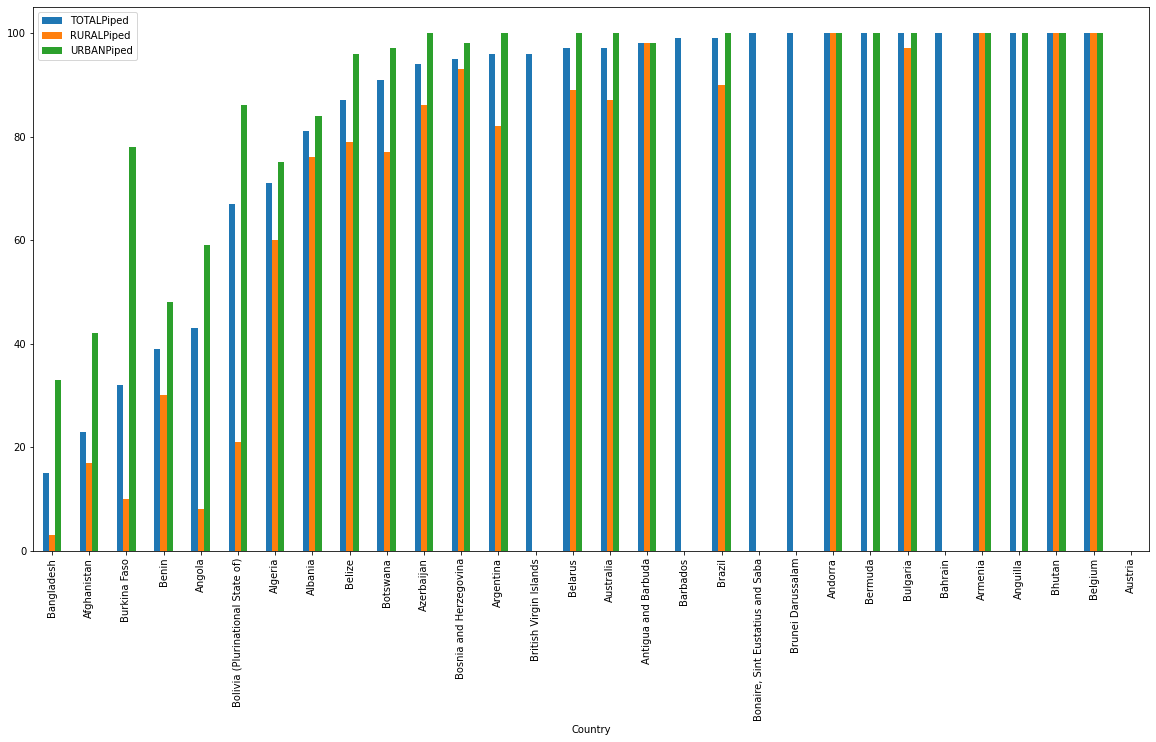

In [10]:
# see correlation between TOTALPiped, RURALPiped, and URBANPiped, view sorted by TOTALPiped on graph
df.head(30)[['TOTALPiped', 'RURALPiped', 'URBANPiped']].sort_values(by='TOTALPiped').plot(kind='bar', figsize=(20,10))


In [11]:
# find the missing data columns:
# Total Piped BUT no Rural Piped
# Total Piped BUT no Urban Piped
# Total Piped BUT no Urban Piped or Rural Piped

# find the countries that have missing data in the TOTALPiped column
missing_total_piped = df[df['TOTALPiped'].isna()].index
# find the countries that have missing data in the RURALPiped column
missing_rural_piped = df[df['RURALPiped'].isna()].index
# find the countries that have missing data in the URBANPiped column
missing_urban_piped = df[df['URBANPiped'].isna()].index



In [19]:
# # find intersection of the three sets
# missing_total_piped.intersection(missing_rural_piped).intersection(missing_urban_piped)

# find intersection of the TOTALPiped and RURALPiped sets
missing_urban_piped.intersection(missing_rural_piped)

Index(['Austria', 'Bahrain', 'Barbados', 'Bonaire, Sint Eustatius and Saba',
       'British Virgin Islands', 'Brunei Darussalam', 'Cook Islands',
       'Croatia', 'Faroe Islands', 'French Guiana', 'French Polynesia',
       'Greenland', 'Guadeloupe', 'Guam', 'Isle of Man', 'Italy', 'Japan',
       'Kuwait', 'Lebanon', 'Libya', 'Liechtenstein', 'Martinique', 'Mayotte',
       'Montserrat', 'New Caledonia', 'Niue', 'Northern Mariana Islands',
       'Puerto Rico', 'Qatar', 'Republic of Korea', 'Réunion', 'Saint Helena',
       'San Marino', 'Seychelles', 'Slovenia', 'Trinidad and Tobago',
       'Venezuela (Bolivarian Republic of)'],
      dtype='object', name='Country')

In [13]:

# count the number of na values in each column
# generate 'percentage missing'
df.isna().sum()/len(df)*100

% urban             0.938967
TOTALUnimproved     0.469484
RURALUnimproved    21.596244
URBANUnimproved    16.901408
TOTALPiped          1.877934
TOTALNon-piped      1.877934
RURALPiped         22.065728
RURALNon-piped     22.065728
URBANPiped         18.309859
URBANNon-piped     18.309859
dtype: float64